In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = [
    # LaMa Dataset
    {"Dataset": "LaMa", "Model": "vit own", "Voting": "-", "IOU": 43.67, "F1_best": 0.6549, "F1_fixed": 0.5114, "AP": 0.6432},
    {"Dataset": "LaMa", "Model": "rn50 own", "Voting": "-", "IOU": 23.16, "F1_best": 0.5559, "F1_fixed": 0.2834, "AP": 0.5367},
    {"Dataset": "LaMa", "Model": "vit+rn50 own", "Voting": "-", "IOU": 37.49, "F1_best": 0.5824, "F1_fixed": 0.4498, "AP": 0.5779},
    {"Dataset": "LaMa", "Model": "vit pretrained", "Voting": "-", "IOU": 42.63, "F1_best": 0.6821, "F1_fixed": 0.5010, "AP": 0.6708},
    {"Dataset": "LaMa", "Model": "vit+rn50 pretrained", "Voting": "-", "IOU": 43.55, "F1_best": 0.6937, "F1_fixed": 0.5300, "AP": 0.6865},
    {"Dataset": "LaMa", "Model": "vit own (bce+dice)", "Voting": "-", "IOU": 44.98, "F1_best": 0.6861, "F1_fixed": 0.4990, "AP": 0.6797},
    {"Dataset": "LaMa", "Model": "Ensemble 3 own", "Voting": "Hard", "IOU": 40.92, "F1_best": 0.4968, "F1_fixed": 0.4968, "AP": 0.4719},
    {"Dataset": "LaMa", "Model": "Ensemble 3 own", "Voting": "Soft", "IOU": 39.65, "F1_best": 0.7070, "F1_fixed": 0.5003, "AP": 0.6790},
    {"Dataset": "LaMa", "Model": "Ensemble 2 own", "Voting": "Hard", "IOU": 19.66, "F1_best": 0.2972, "F1_fixed": 0.2972, "AP": 0.3446},
    {"Dataset": "LaMa", "Model": "Ensemble 2 own", "Voting": "Soft", "IOU": 25.00, "F1_best": 0.6973, "F1_fixed": 0.3344, "AP": 0.6624},
    {"Dataset": "LaMa", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Hard", "IOU": 42.13, "F1_best": 0.5053, "F1_fixed": 0.5053, "AP": 0.4925},
    {"Dataset": "LaMa", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Soft", "IOU": 41.65, "F1_best": 0.7405, "F1_fixed": 0.5131, "AP": 0.7156},
    
    # LDM Dataset
    {"Dataset": "LDM", "Model": "vit own", "Voting": "-", "IOU": 47.00, "F1_best": 0.6643, "F1_fixed": 0.5496, "AP": 0.6578},
    {"Dataset": "LDM", "Model": "rn50 own", "Voting": "-", "IOU": 45.38, "F1_best": 0.6531, "F1_fixed": 0.5365, "AP": 0.6563},
    {"Dataset": "LDM", "Model": "vit+rn50 own", "Voting": "-", "IOU": 45.49, "F1_best": 0.6356, "F1_fixed": 0.5360, "AP": 0.6367},
    {"Dataset": "LDM", "Model": "vit pretrained", "Voting": "-", "IOU": 48.70, "F1_best": 0.6972, "F1_fixed": 0.5615, "AP": 0.6946},
    {"Dataset": "LDM", "Model": "vit+rn50 pretrained", "Voting": "-", "IOU": 51.03, "F1_best": 0.7261, "F1_fixed": 0.6044, "AP": 0.7265},
    {"Dataset": "LDM", "Model": "vit own (bce+dice)", "Voting": "-", "IOU": 48.94, "F1_best": 0.7089, "F1_fixed": 0.5446, "AP": 0.7083},
    {"Dataset": "LDM", "Model": "Ensemble 3 own", "Voting": "Hard", "IOU": 49.12, "F1_best": 0.5915, "F1_fixed": 0.5915, "AP": 0.5187},
    {"Dataset": "LDM", "Model": "Ensemble 3 own", "Voting": "Soft", "IOU": 48.35, "F1_best": 0.7389, "F1_fixed": 0.5991, "AP": 0.7151},
    {"Dataset": "LDM", "Model": "Ensemble 2 own", "Voting": "Hard", "IOU": 39.02, "F1_best": 0.5103, "F1_fixed": 0.5103, "AP": 0.4544},
    {"Dataset": "LDM", "Model": "Ensemble 2 own", "Voting": "Soft", "IOU": 44.16, "F1_best": 0.7247, "F1_fixed": 0.5505, "AP": 0.6982},
    {"Dataset": "LDM", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Hard", "IOU": 51.32, "F1_best": 0.6047, "F1_fixed": 0.6047, "AP": 0.5438},
    {"Dataset": "LDM", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Soft", "IOU": 51.15, "F1_best": 0.7568, "F1_fixed": 0.6083, "AP": 0.7474},

    # Pluralistic Dataset
    {"Dataset": "Pluralistic", "Model": "vit own", "Voting": "-", "IOU": 53.19, "F1_best": 0.6982, "F1_fixed": 0.6027, "AP": 0.6980},
    {"Dataset": "Pluralistic", "Model": "rn50 own", "Voting": "-", "IOU": 35.34, "F1_best": 0.6213, "F1_fixed": 0.4291, "AP": 0.6180},
    {"Dataset": "Pluralistic", "Model": "vit+rn50 own", "Voting": "-", "IOU": 47.03, "F1_best": 0.6451, "F1_fixed": 0.5395, "AP": 0.6436},
    {"Dataset": "Pluralistic", "Model": "vit pretrained", "Voting": "-", "IOU": 55.55, "F1_best": 0.7560, "F1_fixed": 0.6256, "AP": 0.7556},
    {"Dataset": "Pluralistic", "Model": "vit+rn50 pretrained", "Voting": "-", "IOU": 56.46, "F1_best": 0.7816, "F1_fixed": 0.6551, "AP": 0.7869},
    {"Dataset": "Pluralistic", "Model": "vit own (bce+dice)", "Voting": "-", "IOU": 55.36, "F1_best": 0.7651, "F1_fixed": 0.6077, "AP": 0.7738},
    {"Dataset": "Pluralistic", "Model": "Ensemble 3 own", "Voting": "Hard", "IOU": 52.96, "F1_best": 0.6086, "F1_fixed": 0.6086, "AP": 0.5548},
    {"Dataset": "Pluralistic", "Model": "Ensemble 3 own", "Voting": "Soft", "IOU": 52.59, "F1_best": 0.7626, "F1_fixed": 0.6122, "AP": 0.7474},
    {"Dataset": "Pluralistic", "Model": "Ensemble 2 own", "Voting": "Hard", "IOU": 35.76, "F1_best": 0.4698, "F1_fixed": 0.4698, "AP": 0.4571},
    {"Dataset": "Pluralistic", "Model": "Ensemble 2 own", "Voting": "Soft", "IOU": 41.27, "F1_best": 0.7447, "F1_fixed": 0.5081, "AP": 0.7302},
    {"Dataset": "Pluralistic", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Hard", "IOU": 56.87, "F1_best": 0.6522, "F1_fixed": 0.5974, "AP": 0.5974},
    {"Dataset": "Pluralistic", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Soft", "IOU": 57.05, "F1_best": 0.8066, "F1_fixed": 0.6623, "AP": 0.8002},

    # Repaint-p2-9k Dataset
    {"Dataset": "Repaint-p2-9k", "Model": "vit own", "Voting": "-", "IOU": 43.20, "F1_best": 0.6595, "F1_fixed": 0.5171, "AP": 0.6507},
    {"Dataset": "Repaint-p2-9k", "Model": "rn50 own", "Voting": "-", "IOU": 37.20, "F1_best": 0.6024, "F1_fixed": 0.4462, "AP": 0.6025},
    {"Dataset": "Repaint-p2-9k", "Model": "vit+rn50 own", "Voting": "-", "IOU": 40.41, "F1_best": 0.5838, "F1_fixed": 0.4811, "AP": 0.5873},
    {"Dataset": "Repaint-p2-9k", "Model": "vit pretrained", "Voting": "-", "IOU": 43.71, "F1_best": 0.6743, "F1_fixed": 0.5163, "AP": 0.6733},
    {"Dataset": "Repaint-p2-9k", "Model": "vit+rn50 pretrained", "Voting": "-", "IOU": 44.75, "F1_best": 0.6932, "F1_fixed": 0.5492, "AP": 0.6896},
    {"Dataset": "Repaint-p2-9k", "Model": "vit own (bce+dice)", "Voting": "-", "IOU": 45.37, "F1_best": 0.6746, "F1_fixed": 0.5136, "AP": 0.6790},
    {"Dataset": "Repaint-p2-9k", "Model": "Ensemble 3 own", "Voting": "Hard", "IOU": 43.77, "F1_best": 0.5281, "F1_fixed": 0.5281, "AP": 0.4824},
    {"Dataset": "Repaint-p2-9k", "Model": "Ensemble 3 own", "Voting": "Soft", "IOU": 43.11, "F1_best": 0.6904, "F1_fixed": 0.5305, "AP": 0.6762},
    {"Dataset": "Repaint-p2-9k", "Model": "Ensemble 2 own", "Voting": "Hard", "IOU": 31.33, "F1_best": 0.4293, "F1_fixed": 0.4293, "AP": 0.4091},
    {"Dataset": "Repaint-p2-9k", "Model": "Ensemble 2 own", "Voting": "Soft", "IOU": 36.57, "F1_best": 0.6982, "F1_fixed": 0.4698, "AP": 0.6718},
    {"Dataset": "Repaint-p2-9k", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Hard", "IOU": 45.41, "F1_best": 0.5502, "F1_fixed": 0.5502, "AP": 0.5029},
    {"Dataset": "Repaint-p2-9k", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Soft", "IOU": 44.98, "F1_best": 0.7201, "F1_fixed": 0.5539, "AP": 0.7076},
]

df = pd.DataFrame(data)

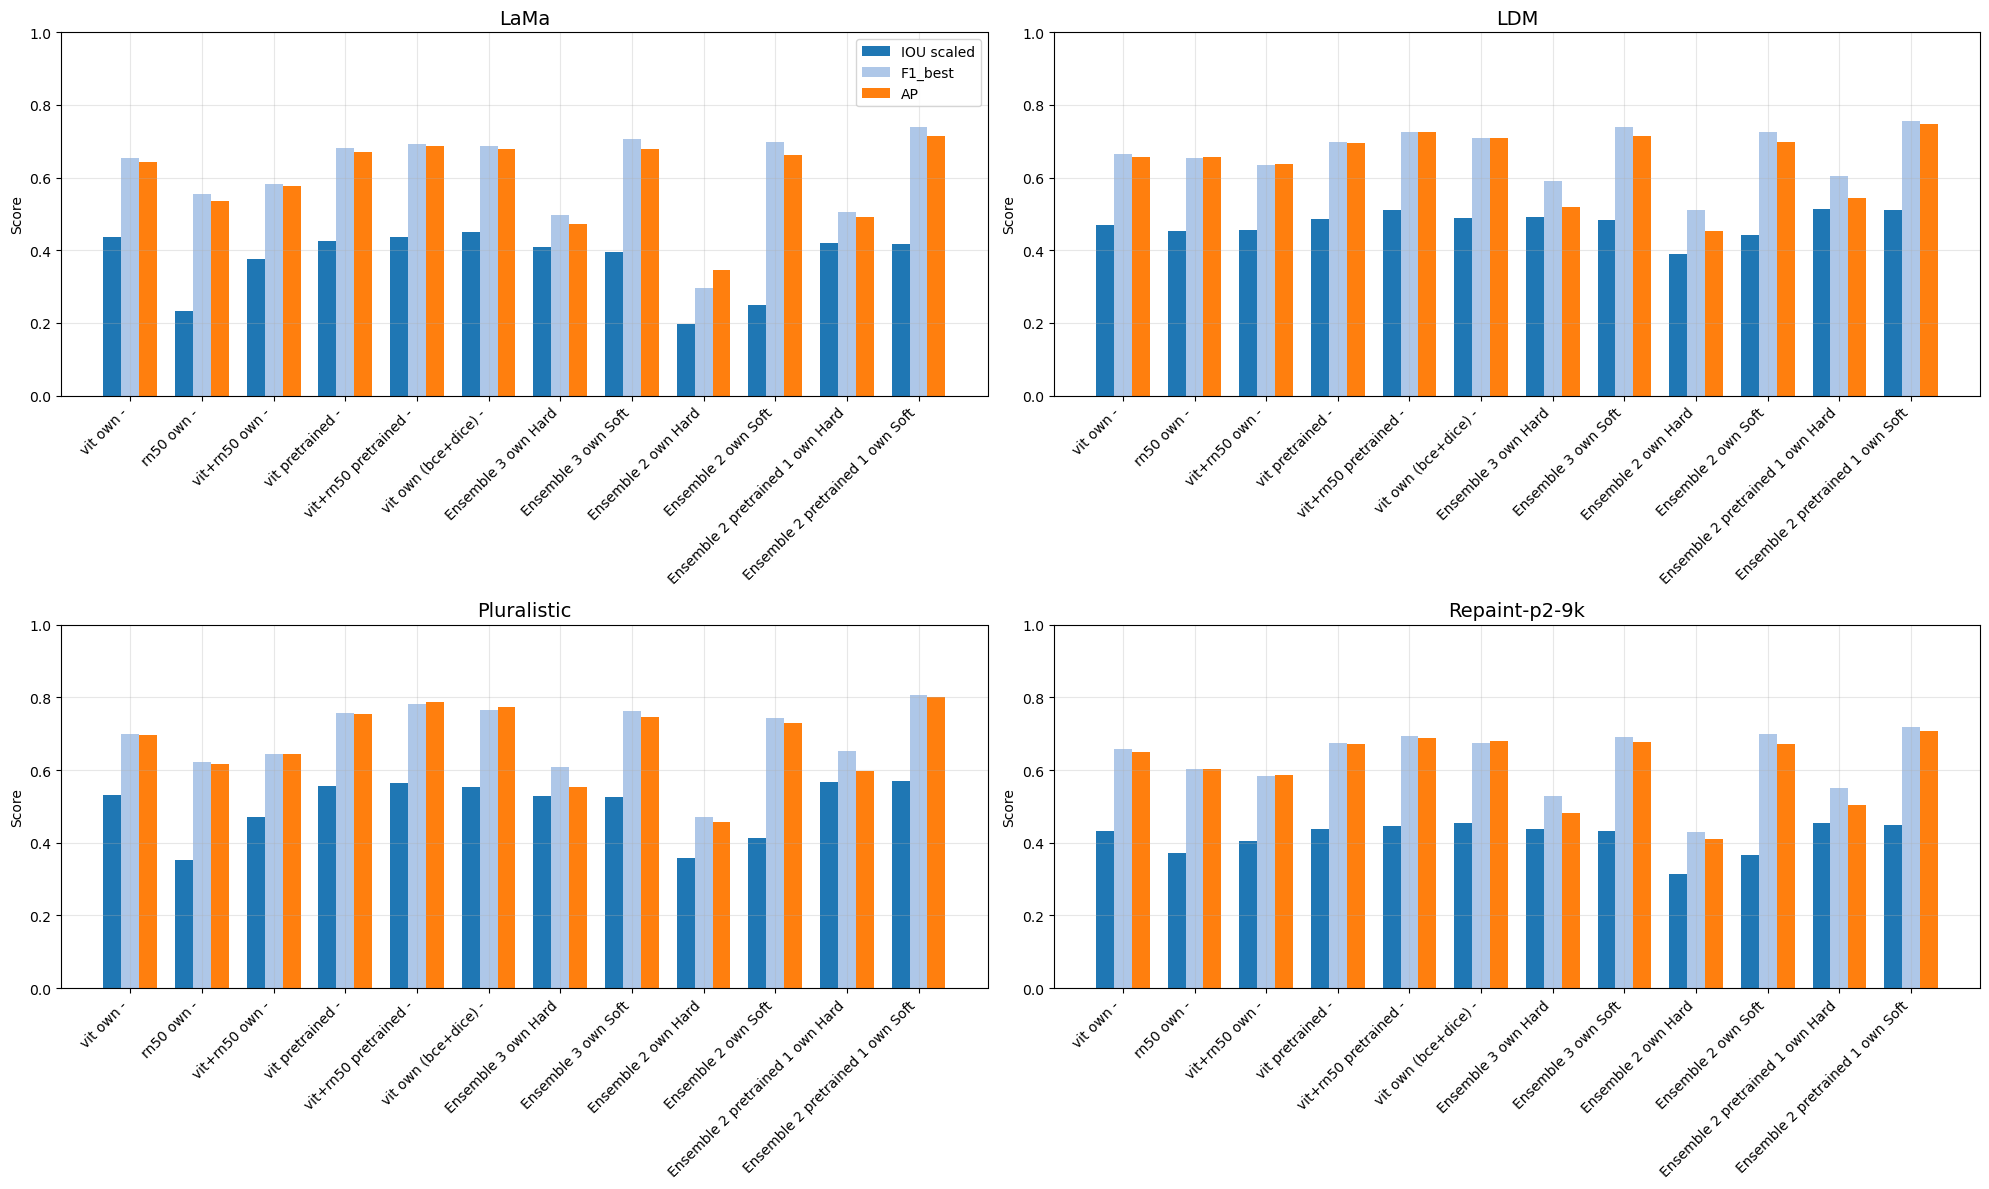

In [9]:
plt.figure(figsize=(20, 12))
datasets = df['Dataset'].unique()
metrics = ['IOU', 'F1_best', 'AP']
colors = plt.cm.tab20.colors

for i, dataset in enumerate(datasets):
    plt.subplot(2, 2, i+1)
    subset = df[df['Dataset'] == dataset]
    
    x = np.arange(len(subset))
    width = 0.25
    
    for j, metric in enumerate(metrics):
        plt.bar(x + j*width, subset[metric] if metric != 'IOU' else subset[metric] / 100, width, 
                label=metric if metric != 'IOU' else 'IOU scaled', 
                color=colors[j])
    
    plt.title(dataset, fontsize=14)
    plt.xticks(x + width, subset['Model'] + " " + subset['Voting'], rotation=45, ha='right')
    plt.ylabel('Score')
    plt.ylim(0, 1 if metric != 'IOU' else 100)
    plt.grid(True, alpha=0.3)
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.show()

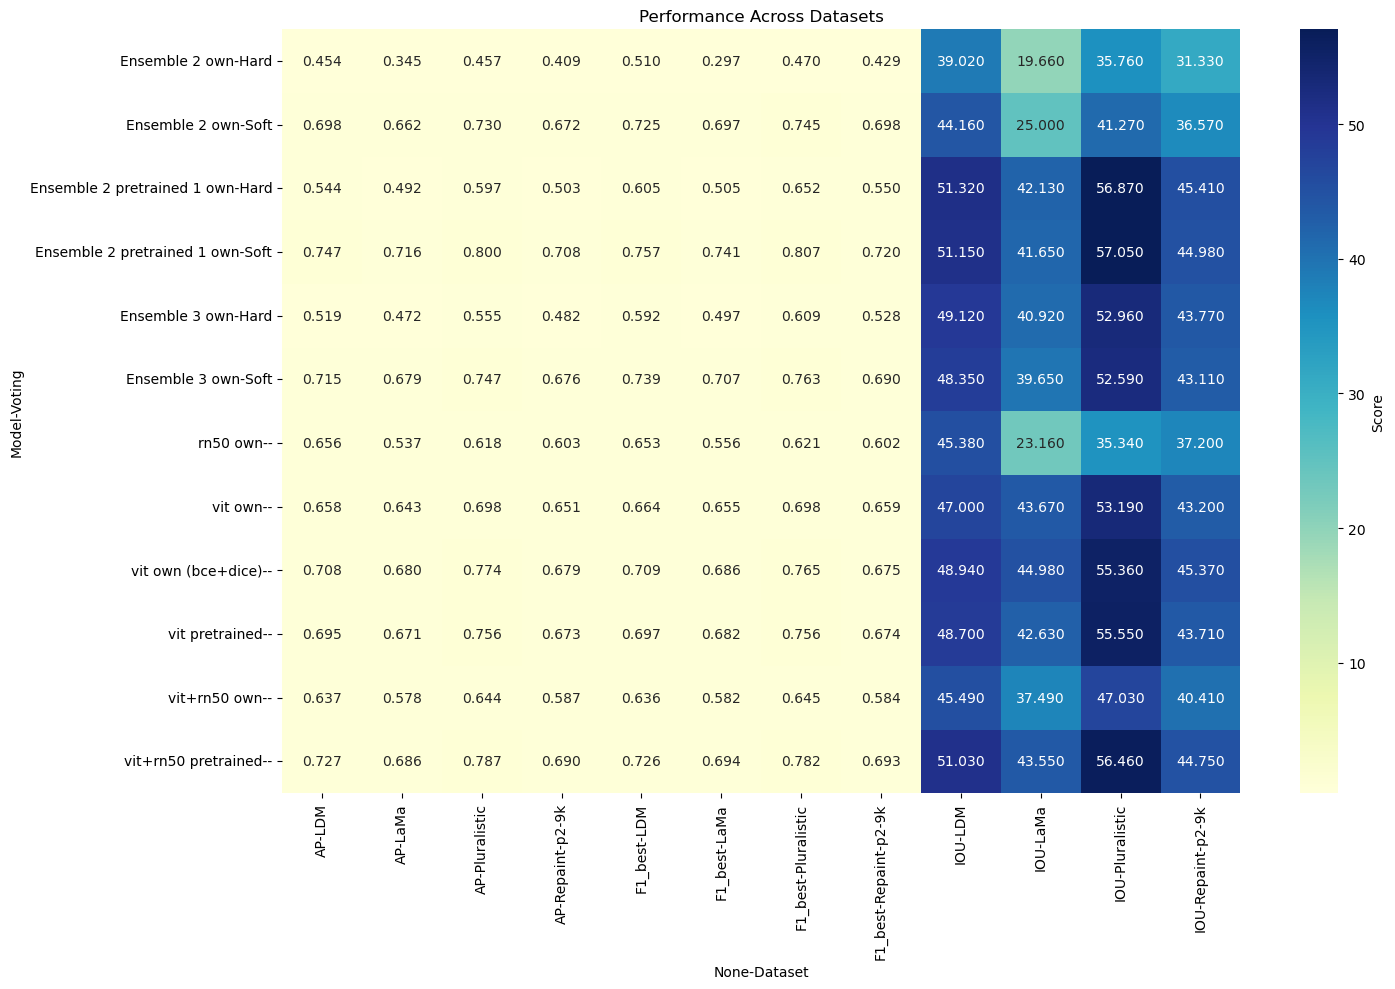

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
pivot = df.pivot_table(index=['Dataset', 'Model', 'Voting'], 
                      values=['IOU', 'F1_best', 'AP']).unstack(level=0)

sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu", 
           cbar_kws={'label': 'Score'})
plt.title('Performance Across Datasets')
plt.tight_layout()
plt.show()

In [1]:
data = [
    # LaMa Dataset
    {"Dataset": "LaMa", "Model": "vit own", "Voting": "-", "IOU": 43.67, "F1_best": 0.6549, "F1_fixed": 0.5114, "AP": 0.6432},
    {"Dataset": "LaMa", "Model": "rn50 own", "Voting": "-", "IOU": 23.16, "F1_best": 0.5559, "F1_fixed": 0.2834, "AP": 0.5367},
    {"Dataset": "LaMa", "Model": "vit+rn50 own", "Voting": "-", "IOU": 37.49, "F1_best": 0.5824, "F1_fixed": 0.4498, "AP": 0.5779},
    {"Dataset": "LaMa", "Model": "vit pretrained", "Voting": "-", "IOU": 42.63, "F1_best": 0.6821, "F1_fixed": 0.5010, "AP": 0.6708},
    {"Dataset": "LaMa", "Model": "vit+rn50 pretrained", "Voting": "-", "IOU": 43.55, "F1_best": 0.6937, "F1_fixed": 0.5300, "AP": 0.6865},
    {"Dataset": "LaMa", "Model": "vit own (bce+dice)", "Voting": "-", "IOU": 44.98, "F1_best": 0.6861, "F1_fixed": 0.4990, "AP": 0.6797},
    {"Dataset": "LaMa", "Model": "Ensemble 3 own", "Voting": "Hard", "IOU": 40.92, "F1_best": 0.4968, "F1_fixed": 0.4968, "AP": 0.4719},
    {"Dataset": "LaMa", "Model": "Ensemble 3 own", "Voting": "Soft", "IOU": 39.65, "F1_best": 0.7070, "F1_fixed": 0.5003, "AP": 0.6790},
    {"Dataset": "LaMa", "Model": "Ensemble 2 own", "Voting": "Hard", "IOU": 19.66, "F1_best": 0.2972, "F1_fixed": 0.2972, "AP": 0.3446},
    {"Dataset": "LaMa", "Model": "Ensemble 2 own", "Voting": "Soft", "IOU": 25.00, "F1_best": 0.6973, "F1_fixed": 0.3344, "AP": 0.6624},
    {"Dataset": "LaMa", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Hard", "IOU": 42.13, "F1_best": 0.5053, "F1_fixed": 0.5053, "AP": 0.4925},
    {"Dataset": "LaMa", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Soft", "IOU": 41.65, "F1_best": 0.7405, "F1_fixed": 0.5131, "AP": 0.7156},
    
    # LDM Dataset
    {"Dataset": "LDM", "Model": "vit own", "Voting": "-", "IOU": 47.00, "F1_best": 0.6643, "F1_fixed": 0.5496, "AP": 0.6578},
    {"Dataset": "LDM", "Model": "rn50 own", "Voting": "-", "IOU": 45.38, "F1_best": 0.6531, "F1_fixed": 0.5365, "AP": 0.6563},
    {"Dataset": "LDM", "Model": "vit+rn50 own", "Voting": "-", "IOU": 45.49, "F1_best": 0.6356, "F1_fixed": 0.5360, "AP": 0.6367},
    {"Dataset": "LDM", "Model": "vit pretrained", "Voting": "-", "IOU": 48.70, "F1_best": 0.6972, "F1_fixed": 0.5615, "AP": 0.6946},
    {"Dataset": "LDM", "Model": "vit+rn50 pretrained", "Voting": "-", "IOU": 51.03, "F1_best": 0.7261, "F1_fixed": 0.6044, "AP": 0.7265},
    {"Dataset": "LDM", "Model": "vit own (bce+dice)", "Voting": "-", "IOU": 48.94, "F1_best": 0.7089, "F1_fixed": 0.5446, "AP": 0.7083},
    {"Dataset": "LDM", "Model": "Ensemble 3 own", "Voting": "Hard", "IOU": 49.12, "F1_best": 0.5915, "F1_fixed": 0.5915, "AP": 0.5187},
    {"Dataset": "LDM", "Model": "Ensemble 3 own", "Voting": "Soft", "IOU": 48.35, "F1_best": 0.7389, "F1_fixed": 0.5991, "AP": 0.7151},
    {"Dataset": "LDM", "Model": "Ensemble 2 own", "Voting": "Hard", "IOU": 39.02, "F1_best": 0.5103, "F1_fixed": 0.5103, "AP": 0.4544},
    {"Dataset": "LDM", "Model": "Ensemble 2 own", "Voting": "Soft", "IOU": 44.16, "F1_best": 0.7247, "F1_fixed": 0.5505, "AP": 0.6982},
    {"Dataset": "LDM", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Hard", "IOU": 51.32, "F1_best": 0.6047, "F1_fixed": 0.6047, "AP": 0.5438},
    {"Dataset": "LDM", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Soft", "IOU": 51.15, "F1_best": 0.7568, "F1_fixed": 0.6083, "AP": 0.7474},

    # Pluralistic Dataset
    {"Dataset": "Pluralistic", "Model": "vit own", "Voting": "-", "IOU": 53.19, "F1_best": 0.6982, "F1_fixed": 0.6027, "AP": 0.6980},
    {"Dataset": "Pluralistic", "Model": "rn50 own", "Voting": "-", "IOU": 35.34, "F1_best": 0.6213, "F1_fixed": 0.4291, "AP": 0.6180},
    {"Dataset": "Pluralistic", "Model": "vit+rn50 own", "Voting": "-", "IOU": 47.03, "F1_best": 0.6451, "F1_fixed": 0.5395, "AP": 0.6436},
    {"Dataset": "Pluralistic", "Model": "vit pretrained", "Voting": "-", "IOU": 55.55, "F1_best": 0.7560, "F1_fixed": 0.6256, "AP": 0.7556},
    {"Dataset": "Pluralistic", "Model": "vit+rn50 pretrained", "Voting": "-", "IOU": 56.46, "F1_best": 0.7816, "F1_fixed": 0.6551, "AP": 0.7869},
    {"Dataset": "Pluralistic", "Model": "vit own (bce+dice)", "Voting": "-", "IOU": 55.36, "F1_best": 0.7651, "F1_fixed": 0.6077, "AP": 0.7738},
    {"Dataset": "Pluralistic", "Model": "Ensemble 3 own", "Voting": "Hard", "IOU": 52.96, "F1_best": 0.6086, "F1_fixed": 0.6086, "AP": 0.5548},
    {"Dataset": "Pluralistic", "Model": "Ensemble 3 own", "Voting": "Soft", "IOU": 52.59, "F1_best": 0.7626, "F1_fixed": 0.6122, "AP": 0.7474},
    {"Dataset": "Pluralistic", "Model": "Ensemble 2 own", "Voting": "Hard", "IOU": 35.76, "F1_best": 0.4698, "F1_fixed": 0.4698, "AP": 0.4571},
    {"Dataset": "Pluralistic", "Model": "Ensemble 2 own", "Voting": "Soft", "IOU": 41.27, "F1_best": 0.7447, "F1_fixed": 0.5081, "AP": 0.7302},
    {"Dataset": "Pluralistic", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Hard", "IOU": 56.87, "F1_best": 0.6522, "F1_fixed": 0.5974, "AP": 0.5974},
    {"Dataset": "Pluralistic", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Soft", "IOU": 57.05, "F1_best": 0.8066, "F1_fixed": 0.6623, "AP": 0.8002},

    # Repaint-p2-9k Dataset
    {"Dataset": "Repaint-p2-9k", "Model": "vit own", "Voting": "-", "IOU": 43.20, "F1_best": 0.6595, "F1_fixed": 0.5171, "AP": 0.6507},
    {"Dataset": "Repaint-p2-9k", "Model": "rn50 own", "Voting": "-", "IOU": 37.20, "F1_best": 0.6024, "F1_fixed": 0.4462, "AP": 0.6025},
    {"Dataset": "Repaint-p2-9k", "Model": "vit+rn50 own", "Voting": "-", "IOU": 40.41, "F1_best": 0.5838, "F1_fixed": 0.4811, "AP": 0.5873},
    {"Dataset": "Repaint-p2-9k", "Model": "vit pretrained", "Voting": "-", "IOU": 43.71, "F1_best": 0.6743, "F1_fixed": 0.5163, "AP": 0.6733},
    {"Dataset": "Repaint-p2-9k", "Model": "vit+rn50 pretrained", "Voting": "-", "IOU": 44.75, "F1_best": 0.6932, "F1_fixed": 0.5492, "AP": 0.6896},
    {"Dataset": "Repaint-p2-9k", "Model": "vit own (bce+dice)", "Voting": "-", "IOU": 45.37, "F1_best": 0.6746, "F1_fixed": 0.5136, "AP": 0.6790},
    {"Dataset": "Repaint-p2-9k", "Model": "Ensemble 3 own", "Voting": "Hard", "IOU": 43.77, "F1_best": 0.5281, "F1_fixed": 0.5281, "AP": 0.4824},
    {"Dataset": "Repaint-p2-9k", "Model": "Ensemble 3 own", "Voting": "Soft", "IOU": 43.11, "F1_best": 0.6904, "F1_fixed": 0.5305, "AP": 0.6762},
    {"Dataset": "Repaint-p2-9k", "Model": "Ensemble 2 own", "Voting": "Hard", "IOU": 31.33, "F1_best": 0.4293, "F1_fixed": 0.4293, "AP": 0.4091},
    {"Dataset": "Repaint-p2-9k", "Model": "Ensemble 2 own", "Voting": "Soft", "IOU": 36.57, "F1_best": 0.6982, "F1_fixed": 0.4698, "AP": 0.6718},
    {"Dataset": "Repaint-p2-9k", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Hard", "IOU": 45.41, "F1_best": 0.5502, "F1_fixed": 0.5502, "AP": 0.5029},
    {"Dataset": "Repaint-p2-9k", "Model": "Ensemble 2 pretrained 1 own", "Voting": "Soft", "IOU": 44.98, "F1_best": 0.7201, "F1_fixed": 0.5539, "AP": 0.7076},
]

from collections import defaultdict

# Group data by model
model_iou = defaultdict(list)

for entry in data:
    model_key = f"{entry['Model']} ({entry['Voting']})" if entry['Voting'] != "-" else entry['Model']
    model_iou[model_key].append(entry['IOU'])

# Calculate averages
model_avg_iou = {}
for model, ious in model_iou.items():
    avg_iou = sum(ious) / len(ious)
    model_avg_iou[model] = avg_iou

# Sort by average IOU (descending)
sorted_models = sorted(model_avg_iou.items(), key=lambda x: x[1], reverse=True)

# Display results
print("Average IOU across 4 datasets for each model:")
for model, avg in sorted_models:
    print(f"{model}: {avg:.2f}%")

Average IOU across 4 datasets for each model:
vit+rn50 pretrained: 48.95%
Ensemble 2 pretrained 1 own (Hard): 48.93%
Ensemble 2 pretrained 1 own (Soft): 48.71%
vit own (bce+dice): 48.66%
vit pretrained: 47.65%
vit own: 46.77%
Ensemble 3 own (Hard): 46.69%
Ensemble 3 own (Soft): 45.92%
vit+rn50 own: 42.61%
Ensemble 2 own (Soft): 36.75%
rn50 own: 35.27%
Ensemble 2 own (Hard): 31.44%
